In [2]:
!pip install tensorflow keras opencv-python numpy pandas scikit-learn

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 7.6/376.0 MB 36.2 MB/s eta 0:00:11
   - -------------------------------------- 16.3/376.0 MB 38.0 MB/s eta 0:00:10
   -- ------------------------------------- 22.5/376.0 MB 36.6 MB/s eta 0:00:10
   -- ------------------------------------- 25.4/376.0 MB 30.4 MB/s eta 0:00:12
   -- ------------------------------------- 27.5/376.0 MB 26.4 MB/s eta 0:00:14
   --- ------------------------------------ 30.9/376.0 MB 24.2 MB/s eta 0:00:15
   --- ------------------------------------ 33.6/376.0 MB 22.7 MB/s eta 0:00:16
   --- ------------------------------------ 35.9/376.0 MB 21.1 MB/s eta 0:00:17
   ---- ----------------------------------- 38.0/376.0 MB 20.0 MB/s eta 0:00:17
   ---- ----------------------------------- 41.2/376.0 MB 19.2 MB/s eta 0:00:18
   ---- ----------------------------------- 44.8/3

In [3]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# --------------------------------------------
# 📁 Section 2: Load and Preprocess Image Dataset from Folders
# --------------------------------------------
# Folder structure:
# - train/
#   - Angry/
#   - Disgust/
#   - Fear/
#   - Happy/
#   - Neutral/
#   - Sad/
#   - Surprise/
# - test/
#   - Same structure as train/

img_width, img_height = 48, 48
batch_size = 64

import os

# Set the base directory where 'train' and 'test' folders are located
base_dir = r'C:/Users/sehga/Downloads/archive (1)'
train_data_dir = os.path.join(base_dir, 'train')
test_data_dir = os.path.join(base_dir, 'test')


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [18]:
import os 
print("Current directory:", os.getcwd()) 
print("Folders in current directory:", os.listdir())

Current directory: C:\Users\sehga
Folders in current directory: ['.anaconda', '.bash_history', '.conda', '.condarc', '.continuum', '.git', '.git-for-windows-updater', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.lesshst', '.matplotlib', '.node_repl_history', '.vscode', '3D Objects', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'DETECTION.ipynb', 'Documents', 'Downloads', 'E-Commerce(Data analyst).ipynb', 'Favorites', 'H', 'IBM_2.ipynb', 'IBM_3.ipynb', 'IBM_4.ipynb', 'IBM_5.ipynb', 'IBM_6.ipynb', 'IBM_FINAL_MODULE-1.ipynb', 'IBM_Practice.ipynb', 'index.html', 'Instructor.db', 'IntelGraphicsProfiles', 'java', 'Links', 'Local Settings', 'MasteringPython.ipynb', 'Message', 'module2_assessment', 'Music', 'My Documents', 'NetHood', 'node_modules', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer000000

In [7]:
# --------------------------------------------
# 🧠 Section 3: Build the CNN Model
# --------------------------------------------
model = Sequential()
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()


C:\Users\sehga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [9]:
# --------------------------------------------
# 🚀 Section 4: Train and Save Model
# --------------------------------------------
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)
model.save("model.h5")
print("✅ Model trained and saved as model.h5")

C:\Users\sehga\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 1228s 3s/step - accuracy: 0.2216 - loss: 2.0606 - val_accuracy: 0.1718 - val_loss: 1.9534
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 962s 2s/step - accuracy: 0.2998 - loss: 1.8147 - val_accuracy: 0.3480 - val_loss: 1.7040
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.3513 - loss: 1.6973 - val_accuracy: 0.3626 - val_loss: 1.7044
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 527s 1s/step - accuracy: 0.3868 - loss: 1.5941 - val_accuracy: 0.4087 - val_loss: 1.5491
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step - accuracy: 0.4158 - loss: 1.5310 - val_accuracy: 0.4354 - val_loss: 1.4762
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.4345 - loss: 1.4775 - val_accuracy: 0.4306 - val_loss: 1.5519
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 470s 1s/step - accuracy: 0.4627 - loss: 1.4005 - val_accuracy: 0.4720 - val_loss: 1.3803
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 484s 1s/step - accuracy: 0.4863 - loss: 1.3502 - val_acc

✅ Model trained and saved as model.h5


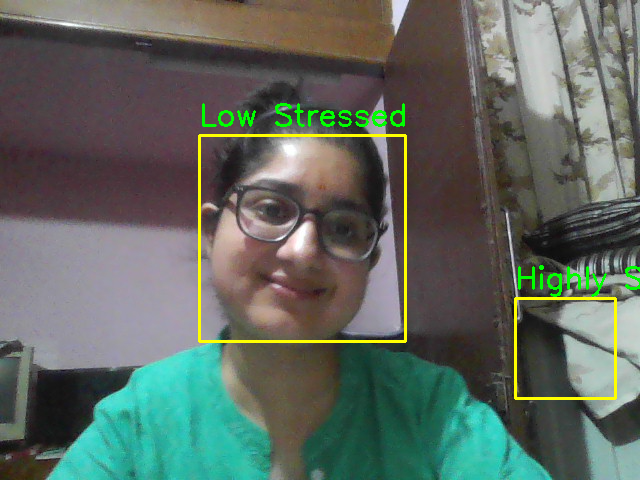

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [ ]:
# --------------------------------------------
# 👁 Section 5: Real-Time Emotion Detection (Webcam — Optional)
# --------------------------------------------
from IPython.display import display, clear_output
from PIL import Image

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
classifier = load_model("model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)
print("📷 Starting webcam stream. Press Ctrl+C to stop.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray)

        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (48,48))
            roi = roi_gray.astype('float32') / 255.0
            roi = np.expand_dims(roi, axis=0)
            roi = np.expand_dims(roi, axis=-1)

            prediction = classifier.predict(roi)[0]
            emotion = emotion_labels[np.argmax(prediction)]

            if emotion in ['Fear', 'Angry', 'Sad']:
                stress_level = "Highly Stressed"
            elif emotion in ['Disgust', 'Neutral']:
                stress_level = "Low Stressed"
            else:
                stress_level = "Not Stressed"

            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,255), 2)
            cv2.putText(frame, stress_level, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(rgb)
        clear_output(wait=True)
        display(img)

except KeyboardInterrupt:
    print("👋 Stopped by user")

cap.release()
cv2.destroyAllWindows()
print("✅ Webcam released")